## AZ6 - HOPFIELD

In [384]:
import numpy as np
import matplotlib.pyplot as plt

In [385]:
x = np.array([1, 1, 0, 0])
x2=np.array([-1,-1,1,1])

In [386]:
# Step 2: Calculate the weight matrix using Hebbian learning
w1 = np.outer(x, x)  # Outer product of the pattern with itself
np.fill_diagonal(w1, 0)  # Set diagonal elements to zero to avoid self-connections
w2 = np.outer(x2,x2)
np.fill_diagonal(w2, 0)

In [387]:
print("Weight matrix W:")
print(w1)
print("Weight matrix W2:")
print(w2)

Weight matrix W:
[[0 1 0 0]
 [1 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
Weight matrix W2:
[[ 0  1 -1 -1]
 [ 1  0 -1 -1]
 [-1 -1  0  1]
 [-1 -1  1  0]]


In [388]:
def update_hopfield(state, W):
    return np.sign(np.dot(W, state))

# Step 4: Test the Hopfield network by recalling the stored pattern
# Define an initial state (can be the original pattern or a noisy version)
initial_state = np.array([1, 1, -1, -1])  # You can modify this to test noisy inputs

# Update the state using the Hopfield network
updated_state = update_hopfield(initial_state, w1)
updated_state2 = update_hopfield(initial_state, w2)

print("\nInitial state:")
print(initial_state)
print("\nUpdated state:")
print(updated_state)

print("\nUpdated state2:")
print(updated_state2)


Initial state:
[ 1  1 -1 -1]

Updated state:
[1 1 0 0]

Updated state2:
[ 1  1 -1 -1]


1-j

In [389]:
W = w1 + w2

# Step 4: Set the diagonal elements to zero to avoid self-connections
np.fill_diagonal(W, 0)

# Step 5: Display the final weight matrix
print("Weight matrix W:")
print(W)

Weight matrix W:
[[ 0  2 -1 -1]
 [ 2  0 -1 -1]
 [-1 -1  0  1]
 [-1 -1  1  0]]


In [390]:
updated_state3 = update_hopfield(initial_state, W)
print(updated_state3)

[ 1  1 -1 -1]


In [391]:
# Step 1: Define the weight matrix from the image
W = np.array([[0, 0, 1, -1],
              [1, 0, 1, -1],
              [1, 1, 0, -1],
              [-1, -1, -1, 0]])


In [392]:
# Step 2: Define the activation function (sign function for Hopfield networks)
def activation(x):
    return np.where(x >= 0, 1, -1)

In [393]:
# Step 3: Define a function to update the network (synchronous update)
def update_hopfield(state, W):
    return activation(np.dot(W, state))

In [394]:
# Step 4: Test the Hopfield network by recalling the stored pattern
# Define an initial state (can be the original pattern or a noisy version)
initial_state = np.array([1, 1, -1, -1])  # This can be modified for testing with noise

In [395]:
# Update the state using the Hopfield network
updated_state = update_hopfield(initial_state, W)

# Display results
print("Initial state:")
print(initial_state)
print("\nUpdated state (after applying the weight matrix):")
print(updated_state)

Initial state:
[ 1  1 -1 -1]

Updated state (after applying the weight matrix):
[ 1  1  1 -1]


In [396]:
class HopfieldNetwork:
    def __init__(self, patterns):
        # Flatten the patterns and store them
        self.patterns = np.array([p.flatten() for p in patterns])
        self.size = self.patterns.shape[1]
        self.weights = np.zeros((self.size, self.size))
        # Train network with the given patterns
        self.train()

    def train(self):
        # Hebbian learning rule for weight adjustment
        for p in self.patterns:
            self.weights += np.outer(p, p)
        np.fill_diagonal(self.weights, 0)

    def add_noise(self, pattern, noise_level):
        noisy_pattern = pattern.flatten()
        num_flips = int(noise_level * noisy_pattern.size)
        flip_indices = np.random.choice(noisy_pattern.size, size=num_flips, replace=False)
        noisy_pattern[flip_indices] *= -1
        return noisy_pattern.reshape(pattern.shape)

    def recall(self, pattern, steps=5):
        # Recall the pattern through iterative update
        pattern = pattern.flatten()
        for _ in range(steps):
            pattern = np.sign(np.dot(self.weights, pattern))
        return pattern.reshape((9, 8))


In [397]:
b = np.array([[ 1,  1,  1,  1,  1,  1,  1,  1],
    [ 1,  1,  1,  1,  1,  1,  1,  1],
    [ 1,  1,  1, 1, 1, 1, 1,  1],
    [ -1,  1,  1,  1,  1,  1,  1,  -1],
    [ -1,  -1,  -1, -1,  -1,  -1,  -1,  -1],
    [ 1,  1,  1,  1,  1,  1,  1,  1],
    [ 1,  1,  1,  1,  -1,  1,  1,  1],
    [ 1,  1,  1,  1,  1,  1,  1,  1],
    [1  ,1  ,1  ,1,1,1,1,1]])
d = np.array([[ 1,  1,  1,  1,  1,  1,  1,  1],
    [ 1,  1,  1,  -1,  -1,  1,  1,  1],
    [ 1,  1,  1, 1, -1, -1, 1,  1],
    [ 1,  1,  1,  1,  1,  -1,  -1, 1],
    [ 1,  1,  1, 1,  1,  1,  -1,  -1],
    [ 1,  1,  1,  1,  1,  -1,  -1, 1],
    [ 1,  1,  1, 1, -1, -1, 1,  1],
    [ 1,  1,  1,  -1,  -1,  1,  1,  1],
    [1,  1,  1,  1,  1,  1,  1,  1]])
k = np.array([[ 1,  1,  1,  1,  1,  1,  1,  -1],
    [ 1,  1,  1,  1,  1,  1,  -1,  1],
    [ 1,  1,  1, 1, 1, -1, 1,  1],
    [ 1,  1,  1,  1,  -1,  1,  1, 1],
    [ 1,  1,  1,  1,  -1,  1,  1, 1],
    [ 1,  1,  1,  1,  -1,  1,  1, 1],
    [ 1,  1,  1,  1,  -1,  1,  1, 1],
    [ -1,  1,  1,  1,  -1,  1,  1,  1],
    [-1,  -1,  -1,  -1,  -1,  1,  1,  1]])

In [398]:
# Create and train the Hopfield Network
hopfield_net = HopfieldNetwork([b, d, k])

In [399]:
# Add noise to the 'b' pattern and attempt to recall
noisy_b = hopfield_net.add_noise(b, noise_level=0.2)
recalled_b = hopfield_net.recall(noisy_b)
# Add noise to the 'd' pattern and attempt to recall
noisy_d = hopfield_net.add_noise(d, noise_level=0.2)
recalled_d = hopfield_net.recall(noisy_d)
# Add noise to the 'k' pattern and attempt to recall
noisy_k = hopfield_net.add_noise(k, noise_level=0.2)
recalled_k = hopfield_net.recall(noisy_k)

In [400]:
print("Noisy Pattern:\n", noisy_b)
print("Recalled Pattern:\n", recalled_b)

Noisy Pattern:
 [[ 1  1 -1  1  1 -1  1  1]
 [ 1  1  1  1  1  1 -1 -1]
 [-1  1  1 -1  1  1 -1  1]
 [-1 -1  1  1  1 -1  1  1]
 [-1 -1 -1  1 -1 -1 -1 -1]
 [ 1  1  1  1  1  1  1  1]
 [-1  1  1  1 -1  1  1  1]
 [ 1  1 -1  1  1  1  1  1]
 [ 1  1 -1  1  1  1  1  1]]
Recalled Pattern:
 [[ 1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.]
 [-1.  1.  1.  1.  1.  1.  1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1. -1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.]]


In [401]:
def plot_pattern(pattern, title):
    plt.imshow(pattern, cmap='gray', interpolation='nearest')
    plt.title(title)
    plt.axis('off')
    plt.show()

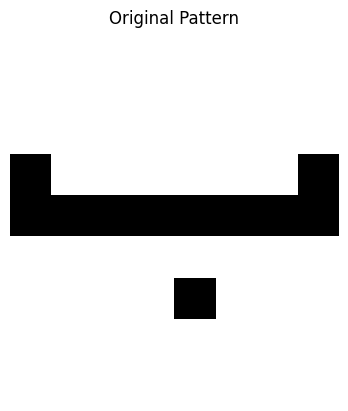

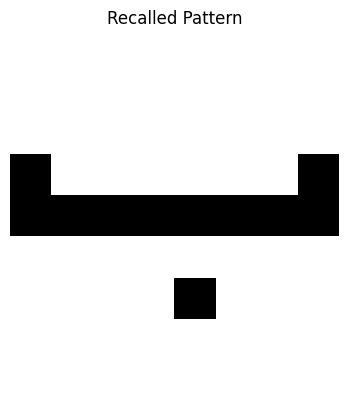

In [402]:
plot_pattern(b, "Original Pattern")
#plot_pattern(noisy_b, "Noisy Pattern")
plot_pattern(recalled_b, "Recalled Pattern")

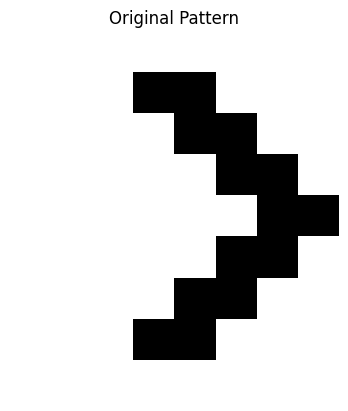

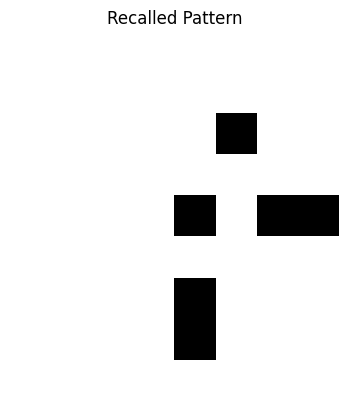

In [403]:
plot_pattern(d, "Original Pattern")
#plot_pattern(noisy_d, "Noisy Pattern")
plot_pattern(recalled_d, "Recalled Pattern")

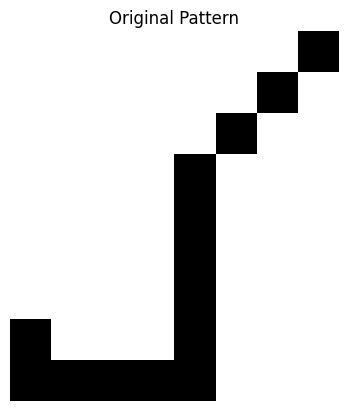

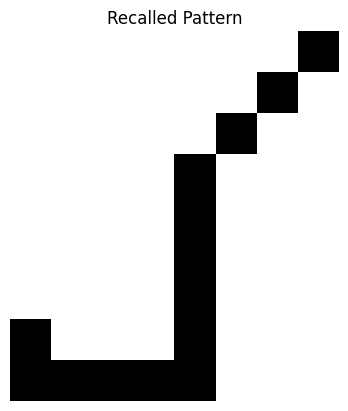

In [404]:
plot_pattern(k, "Original Pattern")
#plot_pattern(noisy_k, "Noisy Pattern")
plot_pattern(recalled_k, "Recalled Pattern")

Network successfully recalled patterns

---

### ***TAMRIN***

##### **Q1**

In [405]:
P = np.array([[ 1,  1,  1,  1,  1,  1,  1,  1],
    [ 1,  1,  1,  1,  1,  1,  1,  1],
    [ 1,  1,  1, 1, 1, 1, 1,  1],
    [ -1,  1,  1,  1,  1,  1,  1,  -1],
    [ -1,  -1,  -1, -1,  -1,  -1,  -1,  -1],
    [ 1,  1,  1,  1,  1,  1,  1,  1],
    [ 1,  1,  1,  -1,  -1,  1,  1,  1],
    [ 1,  1,  1,  -1,  1,  1,  1,  1],
    [1  ,1  ,1  ,1,1,1,1,1]])

G = np.array([[ 1,  1,  1,  1,  -1,  1,  1,  -1],
    [ 1,  1,  1,  -1,  1,  1,  -1,  1],
    [ 1,  1,  1, 1, 1, -1, 1,  1],
    [ 1,  1,  1,  1,  -1,  1,  1, 1],
    [ 1,  1,  1,  1,  -1,  1,  1, 1],
    [ 1,  1,  1,  1,  -1,  1,  1, 1],
    [ 1,  1,  1,  1,  -1,  1,  1, 1],
    [ -1,  1,  1,  1,  -1,  1,  1,  1],
    [-1,  -1,  -1,  -1,  -1,  1,  1,  1]])


In [406]:
hopfield_net2 = HopfieldNetwork([G,P])


In [407]:
noisy_P = hopfield_net.add_noise(P, noise_level=0.4)
recalled_P = hopfield_net.recall(noisy_P)
noisy_G = hopfield_net.add_noise(G, noise_level=0.4)
recalled_G = hopfield_net.recall(noisy_G)

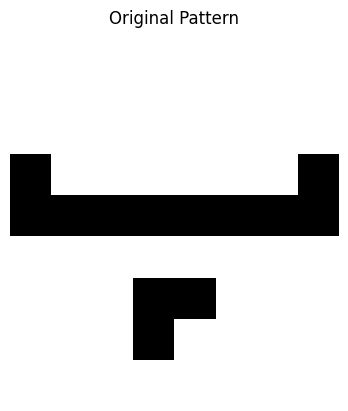

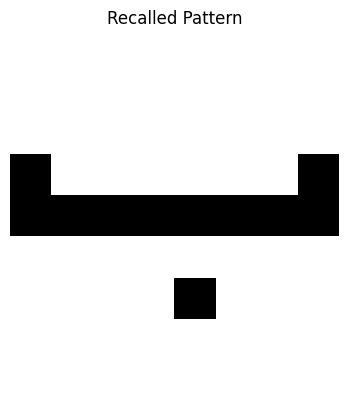

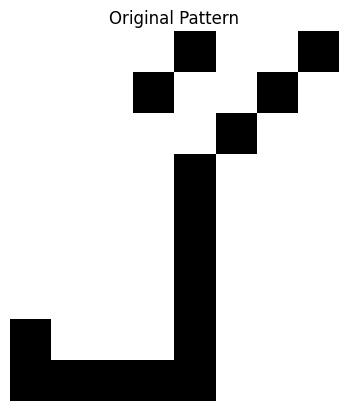

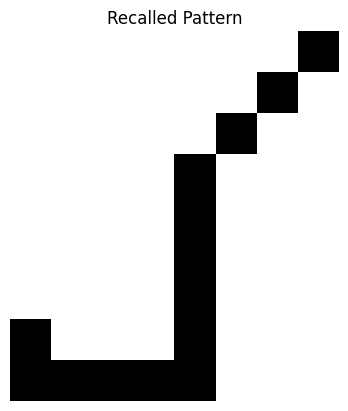

In [408]:
plot_pattern(P, "Original Pattern")
#plot_pattern(noisy_P, "Noisy Pattern")
plot_pattern(recalled_P, "Recalled Pattern")

plot_pattern(G, "Original Pattern")
#plot_pattern(noisy_G, "Noisy Pattern")
plot_pattern(recalled_G, "Recalled Pattern")